In [2]:
import pandas as pd

wti_oil = 'WTI_OIL.xls'
gdp = 'GDP.xls'

wti_df = pd.read_excel(wti_oil, sheet_name='FRED Graph', header=10)
wti_df.rename(columns={"observation_date":"Date", "DCOILWTICO":"WTI_OIL"}, inplace=True)

gdp_df = pd.read_excel(gdp, sheet_name='FRED Graph', header=10)
gdp_df.rename(columns={"observation_date":"Date"}, inplace=True)

print(f'{wti_oil} has {len(wti_df)} rows and starts at {wti_df["Date"].loc[0]} and ends at {wti_df["Date"].iloc[-1]}')
print(f'{gdp} has {len(gdp_df)} rows and starts at {gdp_df["Date"].loc[0]} and ends at {gdp_df["Date"].iloc[-1]}')

WTI_OIL.xls has 145 rows and starts at 1986-01-01 00:00:00 and ends at 2022-01-01 00:00:00
GDP.xls has 300 rows and starts at 1947-01-01 00:00:00 and ends at 2021-10-01 00:00:00


In [3]:
wti_df2 = wti_df.copy()
gdp_df2 = gdp_df.copy()
wti_df2.drop(range(144,145), inplace=True)
gdp_df2.drop(range(0, 156), inplace=True)
wti_df2.set_index('Date',inplace=True)
gdp_df2.set_index('Date',inplace=True)

wti_df2['GDP'] = gdp_df2.GDP

print(wti_df2)
#print(gdp_df2)

              WTI_OIL        GDP
Date                            
1986-01-01  17.217213   4507.894
1986-04-01  13.866094   4545.340
1986-07-01  13.813906   4607.669
1986-10-01  15.406452   4657.627
1987-01-01  18.250328   4722.156
...               ...        ...
2020-10-01  42.524921  21477.597
2021-01-01  58.093443  22038.226
2021-04-01  66.186667  22740.959
2021-07-01  70.575469  23202.344
2021-10-01  77.327302  24008.472

[144 rows x 2 columns]


<AxesSubplot:xlabel='Date', ylabel='GDP'>

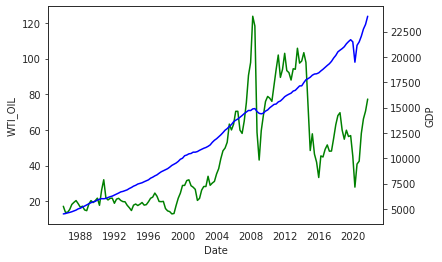

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")

sns.lineplot(data=wti_df2.WTI_OIL, palette="bright", color="g")
ax2 = plt.twinx()
sns.lineplot(data=wti_df2.GDP, color="b", ax=ax2)

In [11]:
wti_df3 = wti_df.copy()
gdp_df3 = gdp_df.copy()
#wti_df3.drop(range(144,145), inplace=True)
#gdp_df3.drop(range(0, 156), inplace=True)
wti_df3.set_index('Date',inplace=True)
gdp_df3.set_index('Date',inplace=True)
wti_df3['GDP'] = gdp_df3.GDP
wti_df3.dropna(inplace=True)

wti_index = []
gdp_index = []

for index, row in wti_df3.iterrows():

    base_wti = wti_df3.iloc[0,0]
    base_GDP = wti_df3.iloc[0,1]
    
    wti_index.append(row['WTI_OIL'] / base_wti * 100)
    gdp_index.append(row['GDP'] / base_GDP * 100)

wti_df3['WTI_Index'] = wti_index
wti_df3['GDP_Index'] = gdp_index

wti_df3.drop(columns=["WTI_OIL", "GDP"], inplace=True)

wti_df3

,WTI_Index,GDP_Index
Date,,
1986-01-01,100.000000,100.000000
1986-04-01,80.536226,100.830676
1986-07-01,80.233114,102.213340
1986-10-01,89.482842,103.321573
1987-01-01,106.000476,104.753040
...,...,...
2020-10-01,246.990732,476.444144
2021-01-01,337.414901,488.880750
2021-04-01,384.421487,504.469692


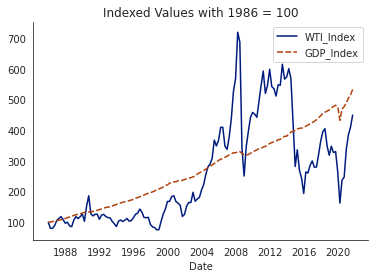

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")

sns.lineplot(data=wti_df3, palette='dark').set(title="Indexed Values with 1986 = 100")
sns.despine()